In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Carga de datos
df_train = pd.read_csv("../data/train/train.csv")
df_test = pd.read_csv("../data/processed/df_test_proce.csv")

# Separación de características y target
X = df_train.drop('price_range', axis=1)
y = df_train['price_range']

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Preparación de los datos de test (df_test ya no tiene la columna 'id')
X_test_scaled = scaler.transform(df_test)


Modelo 1 - Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
y_test_pred_rf = rf.predict(X_test_scaled)

# Evaluación
print("Random Forest Classifier:")
print("Accuracy on Validation:", accuracy_score(y_val, y_pred_rf))
print("Accuracy on Test:", accuracy_score(y_test_pred_rf, y_test_pred_rf))
print(classification_report(y_val, y_pred_rf))



Random Forest Classifier:
Accuracy on Validation: 0.8925
Accuracy on Test: 1.0
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       105
           1       0.90      0.87      0.88        91
           2       0.80      0.85      0.83        92
           3       0.92      0.88      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



Modelo 2 - Support Vector Classifier (SVC)

In [30]:
from sklearn.svm import SVC

# Modelo SVC
svc = SVC(C=1.0, kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_val)
y_test_pred_svc = svc.predict(X_test_scaled)

# Evaluación
print("Support Vector Classifier:")
print("Accuracy on Validation:", accuracy_score(y_val, y_pred_svc))
print("Accuracy on Test:", accuracy_score(y_test_pred_svc, y_test_pred_svc))
print(classification_report(y_val, y_pred_svc))



Support Vector Classifier:
Accuracy on Validation: 0.8925
Accuracy on Test: 1.0
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.80      0.89      0.84        91
           2       0.84      0.82      0.83        92
           3       0.96      0.92      0.94       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



Modelo 3 - Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Modelo Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)
y_test_pred_gb = gb.predict(X_test_scaled)

# Evaluación
print("Gradient Boosting Classifier:")
print("Accuracy on Validation:", accuracy_score(y_val, y_pred_gb))
print("Accuracy on Test:", accuracy_score(y_test_pred_gb, y_test_pred_gb))
print(classification_report(y_val, y_pred_gb))




Gradient Boosting Classifier:
Accuracy on Validation: 0.9175
Accuracy on Test: 1.0
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       105
           1       0.88      0.95      0.91        91
           2       0.87      0.86      0.86        92
           3       0.94      0.91      0.93       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



Modelo 4 - K-Nearest Neighbors (KNN)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)
y_test_pred_knn = knn.predict(X_test_scaled)

# Evaluación
print("K-Nearest Neighbors Classifier:")
print("Accuracy on Validation:", accuracy_score(y_val, y_pred_knn))
print("Accuracy on Test:", accuracy_score(y_test_pred_knn, y_test_pred_knn))
print(classification_report(y_val, y_pred_knn))



K-Nearest Neighbors Classifier:
Accuracy on Validation: 0.53
Accuracy on Test: 1.0
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       105
           1       0.35      0.45      0.39        91
           2       0.36      0.38      0.37        92
           3       0.80      0.54      0.64       112

    accuracy                           0.53       400
   macro avg       0.55      0.52      0.53       400
weighted avg       0.57      0.53      0.54       400



Modelo 5 - Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

# Modelo Logistic Regression
lr = LogisticRegression(C=1.0, solver='liblinear', random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
y_test_pred_lr = lr.predict(X_test_scaled)

# Evaluación
print("Logistic Regression:")
print("Accuracy on Validation:", accuracy_score(y_val, y_pred_lr))
print("Accuracy on Test:", accuracy_score(y_test_pred_lr, y_test_pred_lr))
print(classification_report(y_val, y_pred_lr))



Logistic Regression:
Accuracy on Validation: 0.85
Accuracy on Test: 1.0
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       105
           1       0.79      0.63      0.70        91
           2       0.75      0.72      0.73        92
           3       0.91      1.00      0.95       112

    accuracy                           0.85       400
   macro avg       0.84      0.84      0.83       400
weighted avg       0.84      0.85      0.84       400



Modelo No Supervisado - KMeans Clustering

In [37]:
from sklearn.cluster import KMeans

# Modelo KMeans con n_init especificado
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_val)
clusters_test = kmeans.predict(X_test_scaled)

# Evaluación
print("KMeans Clustering (Validation Data):")
print(pd.crosstab(y_val, clusters))

print("KMeans Clustering (Test Data):")
print(pd.crosstab(clusters_test, clusters_test))


KMeans Clustering (Validation Data):
col_0         0   1   2   3
price_range                
0            34  26  20  25
1            31  17  21  22
2            27  28  16  21
3            22  29  33  28
KMeans Clustering (Test Data):
col_0    0    1    2    3
row_0                    
0      323    0    0    0
1        0  236    0    0
2        0    0  202    0
3        0    0    0  239


Interpretación de Variables

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


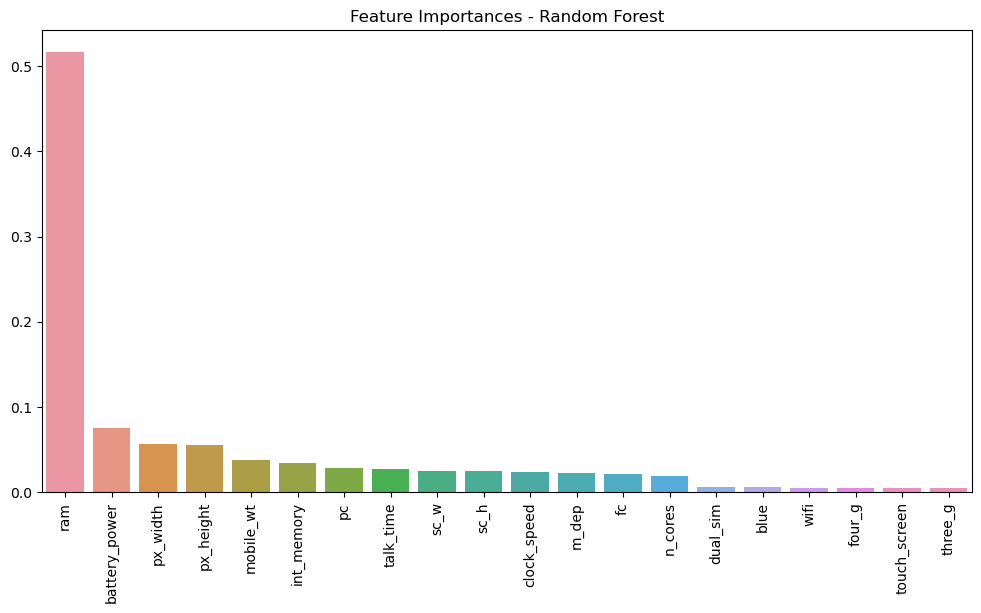

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importancia de características para Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Gráfico de barras de importancia de características
plt.figure(figsize=(12, 6))
sns.barplot(x=[X.columns[i] for i in indices], y=importances[indices])
plt.title("Feature Importances - Random Forest")
plt.xticks(rotation=90)
plt.show()

